In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u

sol_to_earth = 332946.078
AU = 1.496e+13 #cm
M_sun = 1.989e+33 #g
G = 6.6743* 10**(-11) #N⋅m2/kg2

m_pl = 2.7932451e-8 * M_sun / 10**3 # kg, Mass of each planetesimal
m_emb = 2.7932451e-7 * M_sun / 10**3  # solMass, Mass of each planetary embryo
r_emb = 2.39e-5 * AU * 10**(-2) #m, radius of embryo
r_pl = 1.11e-5 * AU * 10**(-2) #m, radius of planetesimal
m_min = 0.5 * m_pl

In [2]:
r_t = (m_emb/(4/3 * np.pi * 3000))**(1/3)
print(r_t)

3535992.3890973562


In [3]:
print(r_emb)

print(r_t - r_emb)

3575440.0
-39447.61090264376


In [28]:
def get_Qs(d, m_t, m_p, rho, theta): #d in AU, m_t and m_p in kg, rho in kg/m^3, theta in radians
    v_rel = np.sqrt((G*M_sun/10**3)/(d *(AU * 10**-2))) #m/s
    r_t = (m_t/(4/3 * np.pi * rho))**(1/3)
    r_p = (m_p/(4/3 * np.pi * rho))**(1/3)
    M_tot = m_t + m_p
    R_tot = r_t + r_p
    b = R_tot * np.sin(theta)
    x_rel = R_tot * np.cos(theta)
    v_esc = np.sqrt(2*G*M_tot/R_tot)
    v_i = np.sqrt(v_rel**2 - 2*G*M_tot*(1/x_rel - 1/R_tot))
    
    Cstar = 1.8
    rho_1 = 1000
    R_1 = (M_tot/(4/3*np.pi*rho_1))**(1/3)
    mu = (m_t*m_p)/(M_tot)
    
    gamma = m_p/m_t
    l = R_tot*(1-np.sin(theta)) #Childs and Steffen 2022
    alpha = (3*r_p*l**2 - l**3)/(4*r_p**3) #Childs and Steffen 2022
    mu_alpha = alpha*m_p*m_t/(m_t + alpha*m_p)
    Q = (mu * v_i**2)/(2*M_tot)
    Q_0 = 0.8 * Cstar * np.pi * rho_1 * G * R_1**2
    Q_star = Q_0 * ((1+gamma)**2/(4*gamma)) * (mu/mu_alpha)**(3/2)
    Q_esc = (mu * v_esc**2)/(2*M_tot)
    merge_thresh = 2 * m_min/M_tot
    return Q, Q_star, Q_esc, merge_thresh, v_i, v_esc, b, mu/mu_alpha
    

In [30]:
theta = np.linspace(0,np.pi/2 - np.pi/50, 100)
Q, Q_star, Q_esc, merge_thresh, v_i, v_esc, b, mu_ratio = get_Qs(2, m_emb, m_pl, 3000, theta)

/tmp/ipykernel_44172/2553054784.py:23: RuntimeWarning: invalid value encountered in power
  Q_star = Q_0 * ((1+gamma)**2/(4*gamma)) * (mu/mu_alpha)**(3/2)


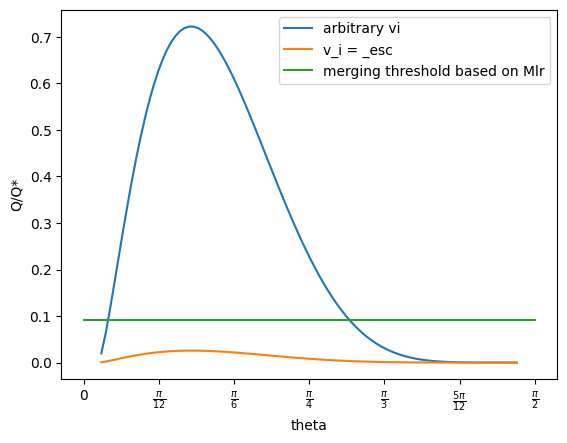

In [31]:
plt.plot(theta, Q/Q_star, label = 'arbitrary vi')
plt.plot(theta, Q_esc/Q_star, label = 'v_i = _esc')

ticks = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/3, np.pi/3+np.pi/12, np.pi/2]  # Desired tick positions
tick_labels = [r"$0$", r"$\frac{\pi}{12}$", r"$\frac{\pi}{6}$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{3}$",r"$\frac{5\pi}{12}$", r"$\frac{\pi}{2}$"]  # Labels
plt.xticks(ticks, tick_labels)

plt.plot([0,np.pi/2], [merge_thresh,merge_thresh], label = 'merging threshold based on Mlr')

plt.legend()
plt.xlabel('theta')
plt.ylabel('Q/Q*')
plt.show()

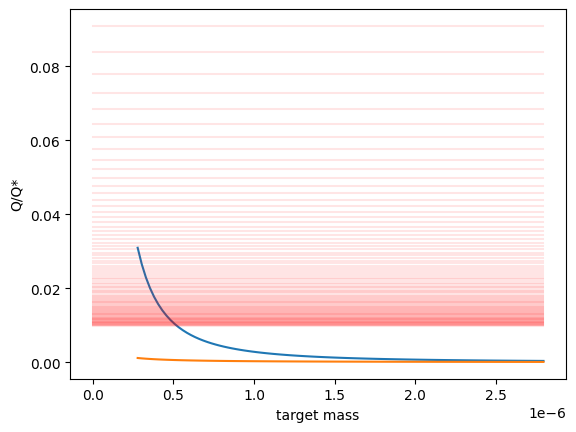

In [45]:
#theta = [0, np.pi/6, np.pi/4, np.pi/3, np.pi * 5/12, np.pi/2]
theta = np.pi/3
m_target = np.linspace(m_emb, 10*m_emb, 100)
Q, Q_star, Q_esc, merge_thresh, v_i, v_esc, b, mu_ratio = get_Qs(2, m_target, m_pl, 3000, theta)

plt.plot(m_target/(M_sun/10**3), Q/Q_star, label = 'arbitrary vi')
plt.plot(m_target/(M_sun/10**3), Q_esc/Q_star, label = 'v_i = _esc')


plt.plot([0,(10 * m_emb)/(M_sun/10**3)], [merge_thresh,merge_thresh], alpha = 0.1, color = 'red', label = 'merging threshold based on Mlr')

#plt.legend()
plt.xlabel('target mass')
plt.ylabel('Q/Q*')
plt.show()